아래와 같이 텍스트 파일을 읽어 옵니다.

In [1]:
import numpy as np
from os import listdir
from os.path import isfile, join

mypath = './example_En_docs/'
onlyfiles = [f for f in listdir(mypath) if isfile(join(mypath, f))]
onlyfiles.sort()

total_docs = []
for file in onlyfiles:
    file_path = mypath+file
    with open(file_path, 'r', encoding='utf8') as f:
        content = f.read()
    total_docs.append(content)

In [2]:
len(total_docs)

15

In [3]:
total_docs[0]

'Ryen Aleman was engrossed in the virtual world, focused on the video game in front of him, when he realized the gunshots he was hearing were real. He ducked and bolted for a restroom to take cover.\nAnother mass shooting was unfolding in Florida, this time at a tournament for competitive players of the football video game, Madden, in Jacksonville. The winners would go on to a higher level tournament in Las Vegas in October, where large cash prizes could be won.\nParticipants had gathered at the Jacksonville Landing Complex, an open-air marketplace with stores, bars and restaurants along the St. Johns River.\n\nDavid Katz, a 24-year-old gamer from Baltimore, Maryland, was in Jacksonville for the tournament at GLHF Game Bar, in the back of a pizza restaurant. On Sunday, he brought a gun into the venue and opened fire, killing two people. Then he turned the gun on himself, Jacksonville Sheriff Mike Williams said. Police have not released a possible motive.\nKatz used at least one handgun

In [4]:
import preprocessing # import a python file for English text preprocessing

In [5]:
stopwords = ['be', 'today', 'yesterday', 'tomorrow'] # 불용어 사전 생성하기

In [6]:
docs_nouns = [preprocessing.En_preprocessing(doc, stopwords) for doc in total_docs]

In [7]:
print(docs_nouns[0]) # 첫번째 문서에 대한 내용 ((문서 내용, [명사단어])로 구성)

['aleman', 'world', 'video', 'game', 'front', 'gunshot', 'restroom', 'cover', 'mass', 'shooting', 'florida', 'time', 'tournament', 'player', 'football', 'video', 'game', 'madden', 'jacksonville', 'winner', 'level', 'tournament', 'vega', 'october', 'cash', 'prize', 'participant', 'jacksonville', 'marketplace', 'store', 'bar', 'restaurant', 'st', 'john', 'river', 'david', 'gamer', 'baltimore', 'maryland', 'jacksonville', 'tournament', 'game', 'bar', 'back', 'pizza', 'restaurant', 'sunday', 'gun', 'venue', 'fire', 'people', 'gun', 'mike', 'williams', 'police', 'motive', 'katz', 'handgun', 'sheriff', 'people', 'wound', 'people', 'area', 'williams', 'victim', 'condition', 'hospital', 'sheriff', 'horror', 'stream', 'event', 'game', 'shot', 'people', 'person', 'f', 'whatd', 'call', 'williams', 'officer', 'scene', 'minute', 'bathroom', 'minute', 'ran', 'scene', 'im', 'member', 'jacksonville', 'fire', 'station', 'rock', 'training', 'parking', 'garage', 'street', 'landing', 'dozen', 'people', 'p

In [8]:
documents_filtered = [' '.join(doc) for doc in docs_nouns]
# 불필요한 단어들을 제거하고 난후 DTM로 변환하기 위해 다시 list of strings의 형태로 변환

In [9]:
documents_filtered[0]

'aleman world video game front gunshot restroom cover mass shooting florida time tournament player football video game madden jacksonville winner level tournament vega october cash prize participant jacksonville marketplace store bar restaurant st john river david gamer baltimore maryland jacksonville tournament game bar back pizza restaurant sunday gun venue fire people gun mike williams police motive katz handgun sheriff people wound people area williams victim condition hospital sheriff horror stream event game shot people person f whatd call williams officer scene minute bathroom minute ran scene im member jacksonville fire station rock training parking garage street landing dozen people president jacksonville association fire fighter person shirt chest wyse person wound firefighter aid others landing wyse officer victim body katzs body hour authority agent bureau alcohol tobacco firearm explosive fbi police family home baltimore katz gaming bread tournament multiple gamers cnn buf

CounterVectorizer 사용해 보기

In [10]:
from sklearn.feature_extraction.text import CountVectorizer # frequency based DTM
tf_vectorizer = CountVectorizer()
DTM_tf = tf_vectorizer.fit_transform(documents_filtered)
DTM_TF = np.array(DTM_tf.todense()) #dense array (즉, 0을 포함한 array)로 변환후 다시 numpy array로 변환

유클리디안 거리와 코사인 유사도 계산해 보기

In [11]:
# 유클리디안 거리
d1d2_tf = np.linalg.norm(DTM_TF[0]-DTM_TF[1])
d1d4_tf = np.linalg.norm(DTM_TF[0]-DTM_TF[3])
d1d6_tf = np.linalg.norm(DTM_TF[0]-DTM_TF[5])
print(d1d2_tf, d1d4_tf, d1d6_tf)

25.11971337416094 31.04834939252005 35.94440151122286


In [12]:
# 코사인 유사도
d1d2_cos_tf = np.dot(DTM_TF[0],DTM_TF[1])/(np.linalg.norm(DTM_TF[0])*np.linalg.norm(DTM_TF[1]))
d1d4_cos_tf = np.dot(DTM_TF[0],DTM_TF[3])/(np.linalg.norm(DTM_TF[0])*np.linalg.norm(DTM_TF[3]))
d1d6_cos_tf = np.dot(DTM_TF[0],DTM_TF[5])/(np.linalg.norm(DTM_TF[0])*np.linalg.norm(DTM_TF[5]))
print(d1d2_cos_tf, d1d4_cos_tf, d1d6_cos_tf)

0.48098450817589 0.0890419846686842 0.03920003859698009


## KMeans 적용하기

In [13]:
from sklearn.cluster import KMeans

In [34]:
!pip list

Package                       Version
----------------------------- -----------
absl-py                       1.4.0
aiohttp                       3.8.4
aiosignal                     1.3.1
anyio                         3.7.0
argon2-cffi                   21.3.0
argon2-cffi-bindings          21.2.0
arviz                         0.15.1
astor                         0.8.1
asttokens                     2.2.1
astunparse                    1.6.3
async-generator               1.10
async-timeout                 4.0.2
attrs                         23.1.0
backcall                      0.2.0
backports.functools-lru-cache 1.6.4
beautifulsoup4                4.12.2
bertopic                      0.15.0
bleach                        6.0.0
blinker                       1.6.2
blis                          0.7.9
cachetools                    5.3.0
catalogue                     2.0.8
certifi                       2023.5.7
cffi                          1.15.1
charset-normalizer            2.1.1
click      

In [14]:
# TF 정보 사용
kmeans = KMeans(n_clusters=5)
clusters_TF = kmeans.fit_predict(DTM_TF) # KMeans 알고리즘으로 학습

C:\Users\yong\anaconda3\envs\textmining47\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\yong\anaconda3\envs\textmining47\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [15]:
clusters_TF

array([4, 4, 4, 3, 2, 3, 3, 3, 1, 1, 1, 1, 0, 0, 0])

In [16]:
# 중심 확인하기 
kmeans.cluster_centers_

array([[0.33333333, 0.33333333, 0.33333333, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.25      , 0.5       ,
        0.5       ],
       [0.        , 1.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [17]:
for i, k in enumerate(clusters_TF):
    dis = np.linalg.norm(DTM_TF[i]-kmeans.cluster_centers_[k])
    print('Doc: {0}, Cluster: {1}, Distance to the center: {2}'.format(i, k, dis))

Doc: 0, Cluster: 4, Distance to the center: 14.306175822583288
Doc: 1, Cluster: 4, Distance to the center: 15.545631755148024
Doc: 2, Cluster: 4, Distance to the center: 16.176114078067904
Doc: 3, Cluster: 3, Distance to the center: 19.06567596493762
Doc: 4, Cluster: 2, Distance to the center: 0.0
Doc: 5, Cluster: 3, Distance to the center: 16.537835408541227
Doc: 6, Cluster: 3, Distance to the center: 12.328828005937952
Doc: 7, Cluster: 3, Distance to the center: 9.848857801796104
Doc: 8, Cluster: 1, Distance to the center: 16.00195300580526
Doc: 9, Cluster: 1, Distance to the center: 12.492497748648987
Doc: 10, Cluster: 1, Distance to the center: 11.792476415070755
Doc: 11, Cluster: 1, Distance to the center: 9.46374661537385
Doc: 12, Cluster: 0, Distance to the center: 13.64632632697248
Doc: 13, Cluster: 0, Distance to the center: 15.670212364724211
Doc: 14, Cluster: 0, Distance to the center: 16.898389140848767


TfidfVectorizer 사용해보기

In [18]:
from sklearn.feature_extraction.text import TfidfVectorizer # tf-idf based DTM
tfidf_vectorizer = TfidfVectorizer()
DTM_tfidf = tfidf_vectorizer.fit_transform(documents_filtered)
DTM_TFIDF = np.array(DTM_tfidf.todense())

In [19]:
#TFIDF 정보 사용
kmeans = KMeans(n_clusters=5)
clusters_TFIDF = kmeans.fit_predict(DTM_TFIDF)

C:\Users\yong\anaconda3\envs\textmining47\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\yong\anaconda3\envs\textmining47\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [20]:
clusters_TFIDF

array([2, 2, 2, 3, 3, 4, 4, 4, 1, 1, 1, 1, 0, 0, 0])

# Elbow 방법

C:\Users\yong\anaconda3\envs\textmining47\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\yong\anaconda3\envs\textmining47\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\yong\anaconda3\envs\textmining47\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\yong\anaconda3\envs\textmining47\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chun

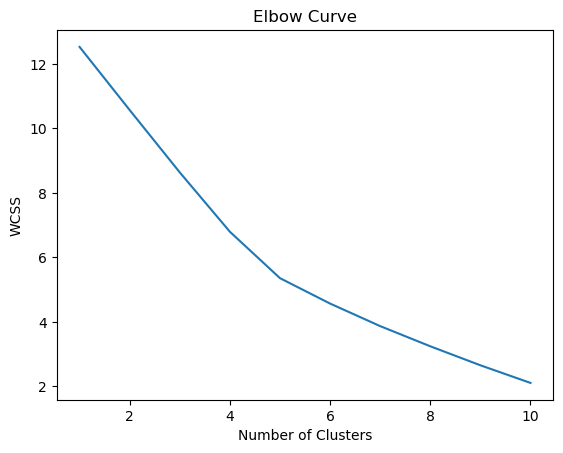

In [21]:
import matplotlib.pyplot as plt
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(DTM_TFIDF)
    wcss.append(kmeans.inertia_) # inertia_ => WCSS

plt.plot(range(1,11),wcss)
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.title('Elbow Curve')
plt.show()

# 실루엣 스코어 계산해 보기

In [22]:
from sklearn.metrics import silhouette_score
for k in range(2,11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    cluster = kmeans.fit_predict(DTM_TFIDF) 
    print(k, silhouette_score(DTM_TFIDF, cluster))

C:\Users\yong\anaconda3\envs\textmining47\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\yong\anaconda3\envs\textmining47\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\yong\anaconda3\envs\textmining47\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\yong\anaconda3\envs\textmining47\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chun

2 0.093105588058899
3 0.1417967060257763
4 0.20398498202942308
5 0.24302353093870296
6 0.22094875903585243
7 0.19474059372141436
8 0.1915073102991595
9 0.18306299142275126
10 0.14400718007859883


C:\Users\yong\anaconda3\envs\textmining47\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\yong\anaconda3\envs\textmining47\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\yong\anaconda3\envs\textmining47\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\yong\anaconda3\envs\textmining47\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chun

# 군집화 결과 평가 지표

### Rand Index

In [23]:
# True labels
true_labels = [0, 0, 0, 1, 1, 2, 2, 2, 3, 3, 3, 3, 4, 4, 4]

In [24]:
from sklearn.metrics import rand_score

In [25]:
rand_score(true_labels, clusters_TF)

0.9619047619047619

In [26]:
rand_score(true_labels, clusters_TFIDF)

1.0

In [27]:
rand_score([0,1,1,1], [0,0,1,1])

0.5

### Adjusted Rand Index

In [28]:
from sklearn.metrics import adjusted_rand_score

In [29]:
adjusted_rand_score(true_labels, clusters_TF)

0.8597194388777555

In [30]:
adjusted_rand_score(true_labels, clusters_TFIDF)

1.0

### Normalized Mutual Information

In [31]:
from sklearn.metrics import normalized_mutual_info_score

In [32]:
normalized_mutual_info_score(true_labels, clusters_TF)

0.9222165931504351

In [33]:
normalized_mutual_info_score(true_labels, clusters_TFIDF)

1.0000000000000002